In [1]:
import pandas as pd 
df = pd.read_csv('heart_disease.csv')

In [2]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
df.count()

male               4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD         4238
dtype: int64

In [5]:
df.dropna(how = 'any',inplace = True)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [8]:
X_train.isnull().count()

male               2924
age                2924
education          2924
currentSmoker      2924
cigsPerDay         2924
BPMeds             2924
prevalentStroke    2924
prevalentHyp       2924
diabetes           2924
totChol            2924
sysBP              2924
diaBP              2924
BMI                2924
heartRate          2924
glucose            2924
dtype: int64

In [15]:
model1 = LogisticRegression(solver = 'warn')
model1.fit(X_train,Y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model1.score(X_test,Y_test)

0.8565573770491803

In [19]:
from sklearn import metrics
Ypred = model1.predict(X_test)

In [20]:
metrics.accuracy_score(Y_test,Ypred)

0.8565573770491803

In [21]:
cm = metrics.confusion_matrix(Y_test,Ypred)
import seaborn as sn

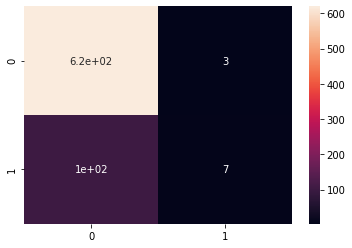

In [22]:
%matplotlib inline
sn.heatmap(cm,annot=True)

In [23]:
TN = cm[0,0]
FP = cm[0,1]
TP = cm[1,1]
FN = cm[1,0]

# classification error

In [24]:
float(FP + FN)/(FP + FN + TP + TN)

0.14344262295081966

# Sensitivity

In [25]:
float(TP)/(TP + FN) #the model is not sensitive

0.06422018348623854

In [27]:
metrics.recall_score(Y_test,Ypred)

0.06422018348623854

# Specificity

In [26]:
float(TN)/(TN + FP)

0.9951845906902087

# False Positive Rate

In [28]:
(FP)/(FP + TN)

0.004815409309791332

In [30]:
from sklearn.svm import SVC
model2 =SVC(kernel = 'linear')
model2.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
model2.score(X_test,Y_test)

0.8510928961748634

In [43]:
Y_pred = model2.predict(X_test)
cm  = metrics.confusion_matrix(Y_test,Y_pred)
TN = cm[0,0]
FP = cm[0,1]
TP = cm[1,1]
FN = cm[1,0]
print("Sensitivity : ", float(TP)/(TP + FN))
print("Specifity : ", float(TN)/(TN + FP))
print("False Positive Rate", (FP)/(FP + TN))
print("Classification Error", (FP + FN)/(FP + FN + TP + TN))

Sensitivity :  0.0
Specifity :  1.0
False Positive Rate 0.0
Classification Error 0.1489071038251366


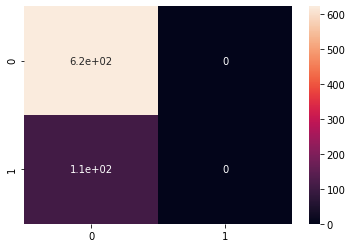

In [44]:
sn.heatmap(cm,annot=True)

In [35]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
model3.score(X_test,Y_test)

0.7390710382513661

In [40]:
Y_pred = model3.predict(X_test)
cm  = metrics.confusion_matrix(Y_test,Y_pred)
TN = cm[0,0]
FP = cm[0,1]
TP = cm[1,1]
FN = cm[1,0]
print("Sensitivity : ", float(TP)/(TP + FN))
print("Specifity : ", float(TN)/(TN + FP))
print("False Positive Rate", (FP)/(FP + TN))
print("Classification Error", (FP + FN)/(FP + FN + TP + TN))

Sensitivity :  0.26605504587155965
Specifity :  0.8218298555377207
False Positive Rate 0.1781701444622793
Classification Error 0.2609289617486339


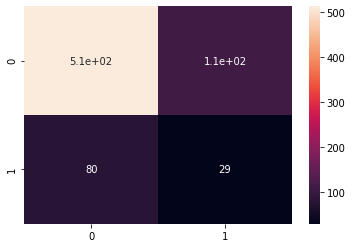

In [42]:
sn.heatmap(cm,annot=True)

Conclusion: model3 has shown much high sensitivity and low Specifity which shows under fitting where as other two models is largely overfitted.